# Bayesian biodiversity: Model data analysis

In [89]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [90]:
# Load black for formatting
import jupyter_black

jupyter_black.load()

## Load data, filter scope and select covariates to analyze

In [91]:
# Load all of the data
df = pl.read_parquet("../../data/output/abundance/abundance_kingdom.parquet")

In [92]:
# Filter the biogeographical scope
scope = {
    "Biome": [
        "Tropical & Subtropical Moist Broadleaf Forests",
        "Tropical & Subtropical Dry Broadleaf Forests",
        "Tropical & Subtropical Coniferous Forests",
    ],
    "Kingdom": ["Animalia", "Plantae"],
}

df_scope = df.clone()
for col in scope.keys():
    df_scope = df_scope.filter(pl.col(col).is_in(scope[col]))

In [93]:
id_cols = ["SS", "SSB", "SSBS"]
group_col = "Kingdom"
response_var = "Max_scaled_abundance_adj"

continuous_covars = [
    "Road_density_1km",
    "Road_density_10km",
    "Road_density_50km",
    "Pop_density_1km",
    "Pop_density_10km",
    "Pop_density_50km",
    "Road_density_1km_log",
    "Road_density_10km_log",
    "Road_density_50km_log",
    "Pop_density_1km_log",
    "Pop_density_10km_log",
    "Pop_density_50km_log",
    "Road_density_1km_sqrt",
    "Road_density_10km_sqrt",
    "Road_density_50km_sqrt",
    "Pop_density_1km_sqrt",
    "Pop_density_10km_sqrt",
    "Pop_density_50km_sqrt",
    "Road_density_1km_cbrt",
    "Road_density_10km_cbrt",
    "Road_density_50km_cbrt",
    "Pop_density_1km_cbrt",
    "Pop_density_10km_cbrt",
    "Pop_density_50km_cbrt",
]

dummy_covars = [
    "Primary vegetation",
    "Young secondary vegetation",
    "Intermediate secondary vegetation",
    "Mature secondary vegetation",
    "Secondary vegetation (indeterminate age)",
    "Plantation forest",
    "Pasture",
    "Cropland",
    "Urban",
]

In [94]:
df_select = df_scope.select(
    id_cols + [group_col] + [response_var] + continuous_covars + dummy_covars
)

## Correlation between response and continuous covariates

In [100]:
def correlation_scatter_plots(df, response, covariates, group_col):
    df = df.to_pandas()

    # Determine the number of unique groups and assign colors
    groups = df[group_col].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(groups)))  # Using a color map

    # Set the figsize dynamically based on the number of covariates
    n_rows, n_cols = 3, 2
    fig, axs = plt.subplots(
        n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), constrained_layout=True
    )

    # Ensure axs is always a 2D array for consistent indexing, even with a single subplot
    if n_rows == 1 and n_cols == 1:
        axs = np.array([[axs]])
    elif n_rows == 1 or n_cols == 1:
        axs = axs.reshape(n_rows, n_cols)

    for i, covariate in enumerate(covariates):
        ax = axs[i // n_cols, i % n_cols]
        for j, group in enumerate(groups):
            group_data = df[df[group_col] == group]

            # Plot the data points for the current group
            ax.scatter(
                group_data[covariate],
                group_data[response],
                alpha=0.5,
                color=colors[j],
                label=(
                    group if i == 0 else ""
                ),  # Label only the first set of plots to avoid duplicate legends
            )
        # ax.set_xlabel(covariate)
        ax.set_ylabel(response)
        ax.set_title(f"{covariate}")

    # Add legend to the first subplot
    axs[0, 0].legend(title=group_col)

    # Hide any empty subplots that aren't used
    for k in range(i + 1, n_rows * n_cols):
        axs.flatten()[k].set_visible(False)

    plt.suptitle(f"Correlation between {response} and covariates", fontsize=12)
    plt.show()

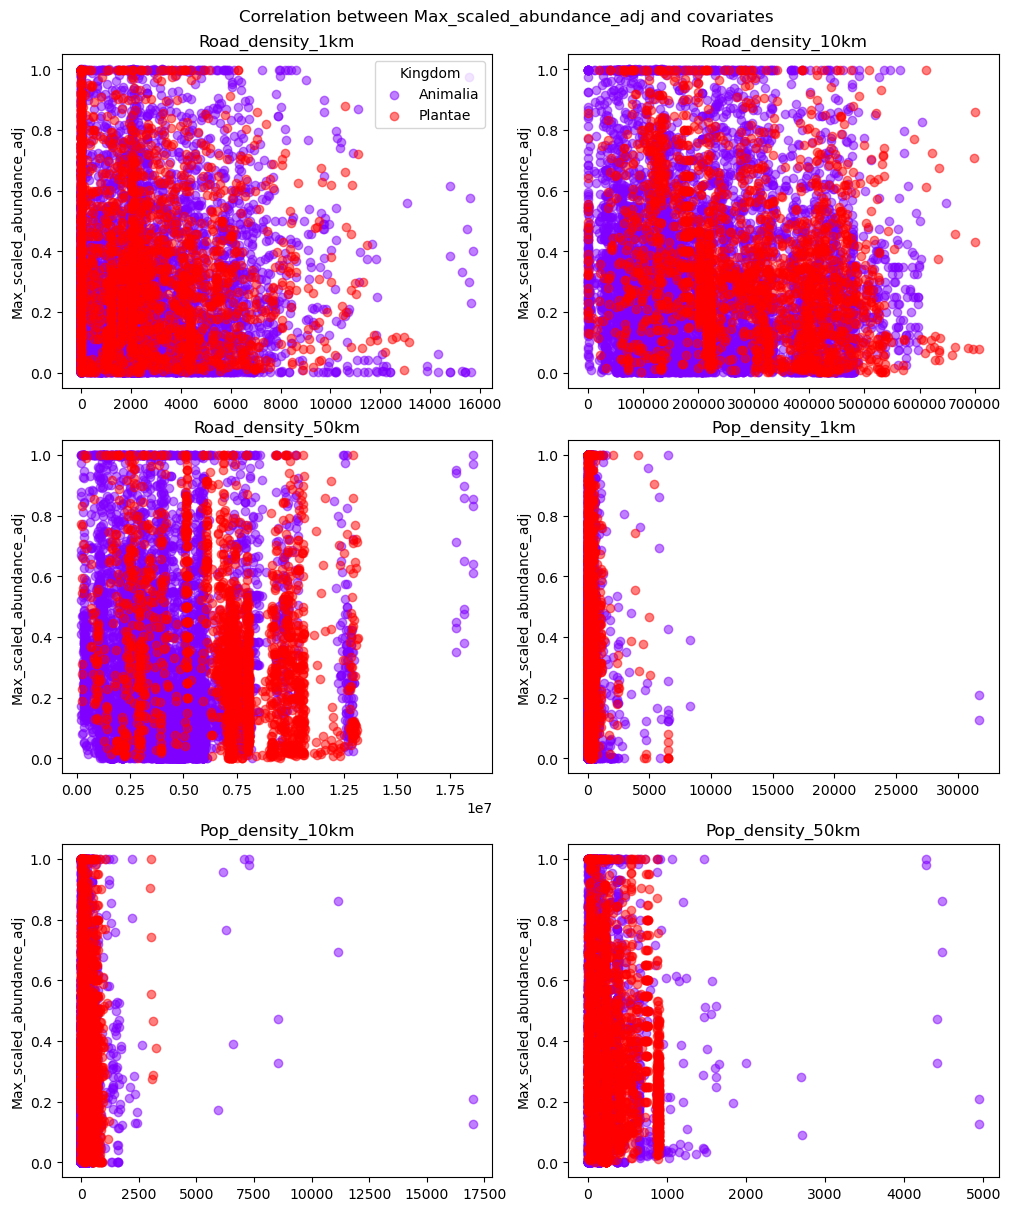

In [101]:
correlation_scatter_plots(
    df_select,
    response=response_var,
    covariates=continuous_covars[0:6],
    group_col=group_col,
)